 📊 **Sentiment140 Dataset Description**

This project uses the **Sentiment140** dataset for sentiment analysis on Twitter posts.  
The dataset consists of **1,600,000 tweets** labeled for sentiment polarity, making it suitable for training machine-learning and NLP models to classify text sentiment.

### 🔗 **Dataset Source**
➡️ **Kaggle Link:** https://www.kaggle.com/datasets/kazanova/sentiment140/data

---

### 🧾 **Dataset Details**

Each entry represents a single tweet and contains the following fields:

| Column | Description |
|--------|-------------|
| `0` | **Sentiment Label** — `0 = Negative`, `2 = Neutral`, `4 = Positive` |
| `1` | Tweet ID |
| `2` | Date & Time |
| `3` | Query (Not Used) |
| `4` | Username |
| `5` | **Tweet Text** |


---

### ✅ **Dataset Characteristics**

- **1.6M labeled tweets**
- Three sentiment classes originally: **Negative, Neutral, Positive**
- English-only tweets
- Emoticons removed in preprocessing
- Frequently used benchmark in **NLP sentiment classification research**

---
### we will work on 500000 samples
### we will use Bag of words and TF-IDF to get 5000 features
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# **Data loading & preprocessing**

In [2]:
train_path = r"C:\Users\moala\Desktop\training.1600000.processed.noemoticon.csv"
test_path = r"C:\Users\moala\Desktop\testdata.manual.2009.06.14.csv"

train = pd.read_csv('training.1600000.processed.noemoticon.csv', header=None, names=['sentiment','id','date','query','user','text'], encoding='latin-1', on_bad_lines='skip', engine='python')
test = pd.read_csv(test_path, encoding="latin-1", header=None, names=['sentiment','id','date','query','user','text'], on_bad_lines='skip', engine='python')

data = pd.concat([train, test], ignore_index=True)
print("train shape:", train.shape)
print("test shape:", test.shape)
print("merged shape:", data.shape)
print(train['sentiment'].value_counts())
data = data.sample(n=500000, random_state=42)
print("Merged shape:", data.shape)
data.head()

train shape: (1600000, 6)
test shape: (498, 6)
merged shape: (1600498, 6)
sentiment
0    800000
4    800000
Name: count, dtype: int64
Merged shape: (500000, 6)


,sentiment,id,date,query,user,text
973720,4,1833222513,Sun May 17 22:38:12 PDT 2009,NO_QUERY,MichaelTorchia,Big day tomorrow! My short film is entered in...
311412,0,2001298093,Tue Jun 02 00:26:08 PDT 2009,NO_QUERY,sydeshow,@oliviaturbo I grew up with sisters... And I n...
651489,0,2237907875,Fri Jun 19 06:32:30 PDT 2009,NO_QUERY,kronberga,@KaivaD and yeah- it's sad that Ashley had to ...
1009097,4,1880867760,Fri May 22 02:47:16 PDT 2009,NO_QUERY,paulina1,@pfmonaco good morning. Awesome that you had a...
1368696,4,2050657599,Fri Jun 05 19:03:54 PDT 2009,NO_QUERY,mlexiehayden,Ok y'all... I'm done now w/ the Hov tomfoolery


In [3]:
# Keep only sentiment label and tweet text columns
data = data[['sentiment', 'text']]
data.columns = ["sentiment", "text"]

data.head()

,sentiment,text
973720,4,Big day tomorrow! My short film is entered in...
311412,0,@oliviaturbo I grew up with sisters... And I n...
651489,0,@KaivaD and yeah- it's sad that Ashley had to ...
1009097,4,@pfmonaco good morning. Awesome that you had a...
1368696,4,Ok y'all... I'm done now w/ the Hov tomfoolery


In [4]:
# Convert sentiment values: 0 = negative, 1 = positive,2 = Neutral
data['sentiment'] = data['sentiment'].replace({4:1})

In [5]:
# Clean tweets: remove URLs, mentions, symbols, and lowercase text
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_and_lemmatize(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[^A-Za-z\s]", "", text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

data["text"] = data["text"].astype(str)
data["text"] = data["text"].apply(clean_and_lemmatize)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moala\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



   - stop_words a set of common English words (for example: the, is, and) that usually do not add much meaning.
   - lemmatizer an object that reduces words to their base form (for example: running → run, better → good).



   The function clean_and_lemmatize(text) performs the following steps:

   re.sub(r"http\S+", "", text) removes URLs.
   -re.sub(r"@\w+", "", text) removes user mentions like @username.
    re.sub(r"[^A-Za-z\s]", "", text) removes everything that is not a letter or a space (numbers, emojis, punctuation, symbols, etc.)
   -text.lower() converts all characters to lowercase.
   -text.split() splits the text into individual words (tokens).

     removes stopwords if w not in stop_words
      lemmatizes each remaining word: lemmatizer.lemmatize(w)
   " ".join(words) joins the cleaned words back into a single string.

   The function returns a cleaned, lowercased, stopword-free, lemmatized version of the original text.

This preprocessing step standardizes the tweets removes noise URLs, mentions, symbols, stopwords and normalizes words which typically improves the performance of text-based machine learning models

In [6]:
X = data["text"]
y = data["sentiment"]

In [7]:
print(X.shape)
print(y.shape)

(500000,)
(500000,)


# Data Analysis

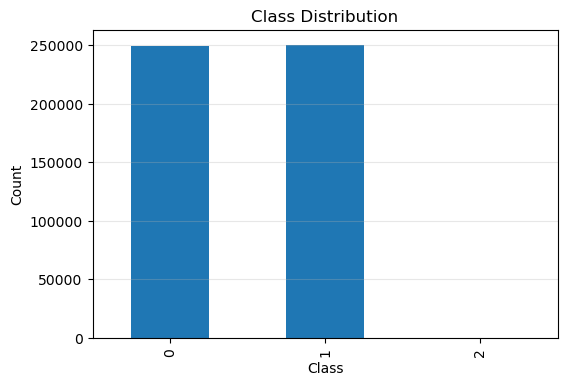

In [8]:
plt.figure(figsize=(6,4))
data["sentiment"].value_counts().sort_index().plot(kind="bar")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(axis="y", alpha=0.3)
plt.show()

This cell visualizes the distribution of the sentiment classes in the dataset.  
It counts how many samples there are for each sentiment label (0, 1, 2), then plots these counts as a bar chart with “Class” on the x-axis and “Count” on the y-axis, and adds a light horizontal grid for easier reading.

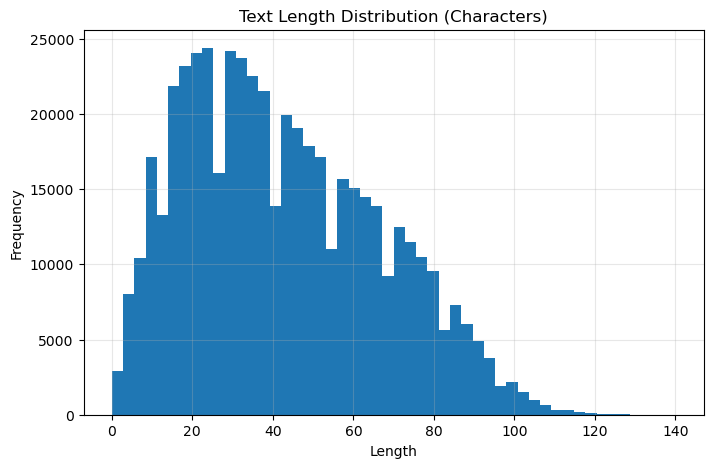

In [10]:
# Text Length Distribution
plt.figure(figsize=(8,5))
data["text_length"] = data["text"].astype(str).apply(len)
plt.hist(data["text_length"], bins=50)
plt.title("Text Length Distribution (Characters)")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

This figure shows a histogram of tweet lengths (in characters).  
The x-axis is the text length, and the y-axis is how many tweets have that length.  
Most tweets are relatively short (around a few dozen characters), with fewer tweets as the length increases, forming a long tail of longer texts.

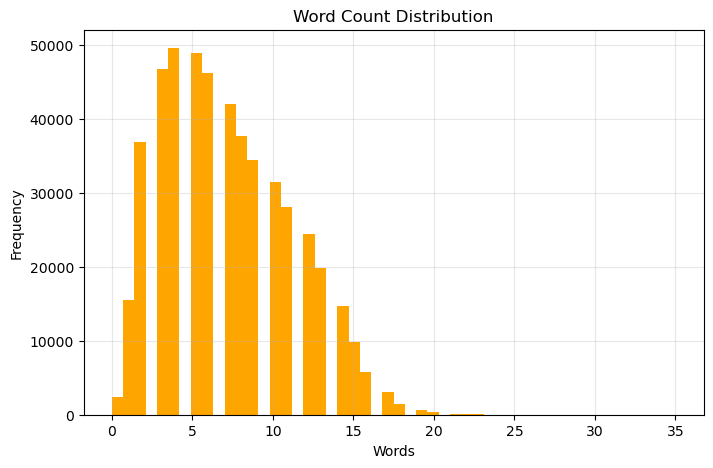

In [11]:
data["word_count"] = data["text"].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
plt.hist(data["word_count"], bins=50, color="orange")
plt.title("Word Count Distribution")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

This figure shows a histogram of the number of words per tweet.  
The x-axis is the word count, and the y-axis is how many tweets have that count.  
Most tweets contain only a few words (around 3–8 words), and very long tweets are rare, so the distribution is heavily concentrated on short messages.

<Figure size 800x500 with 0 Axes>

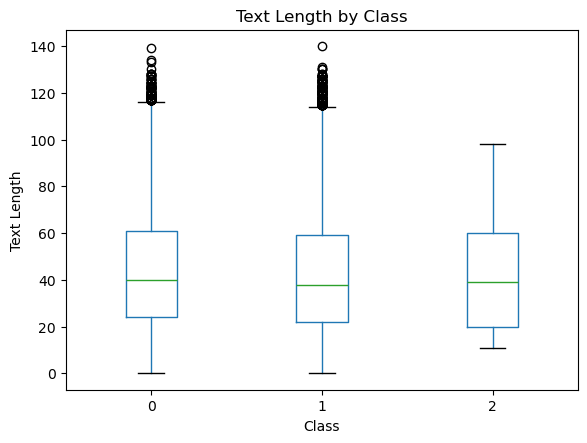

In [12]:
# Boxplot of Text Length per Class
plt.figure(figsize=(8,5))
data.boxplot(column="text_length", by="sentiment", grid=False)
plt.title("Text Length by Class")
plt.suptitle("")
plt.xlabel("Class")
plt.ylabel("Text Length")
plt.show()

<Figure size 800x500 with 0 Axes>

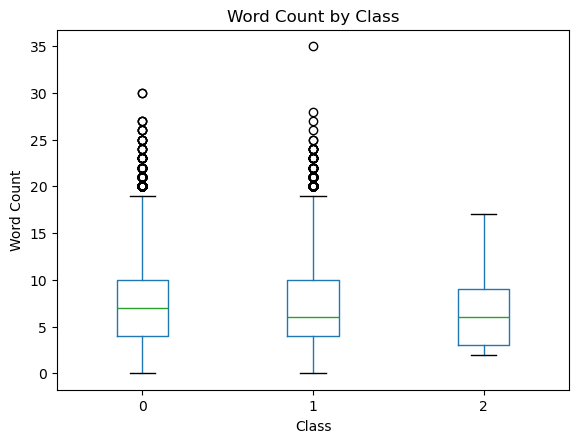

In [13]:
# Boxplot of Word Count per Class
plt.figure(figsize=(8,5))
data.boxplot(column="word_count", by="sentiment", grid=False)
plt.title("Word Count by Class")
plt.suptitle("")
plt.xlabel("Class")
plt.ylabel("Word Count")
plt.show()

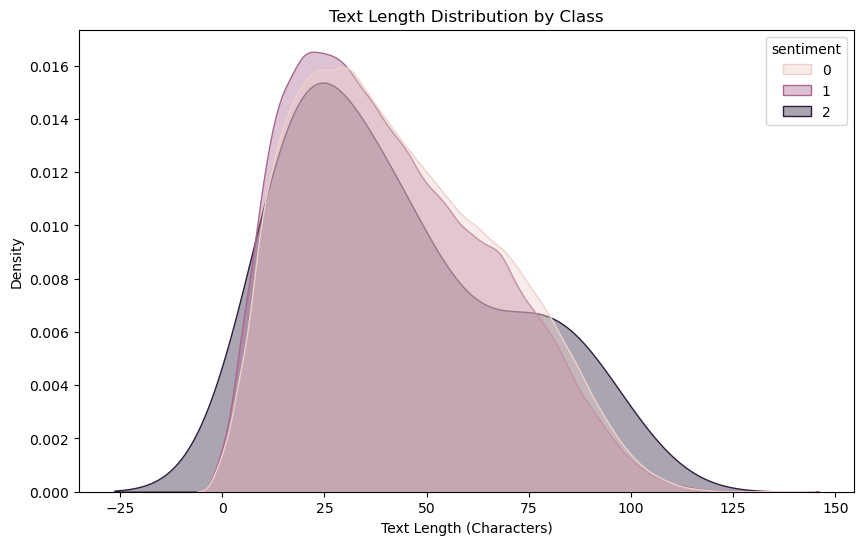

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.kdeplot(
    data=data,
    x="text_length",
    hue="sentiment",
    fill=True,
    common_norm=False,
    alpha=0.4
)
plt.title("Text Length Distribution by Class")
plt.xlabel("Text Length (Characters)")
plt.ylabel("Density")
plt.show()


**The text length distributions for all three sentiment classes overlap almost completely, meaning positive, negative, and neutral tweets have similar lengths. This shows that text length does not help distinguish sentiment, and models must rely on the actual words and meaning, not how long the text is.**

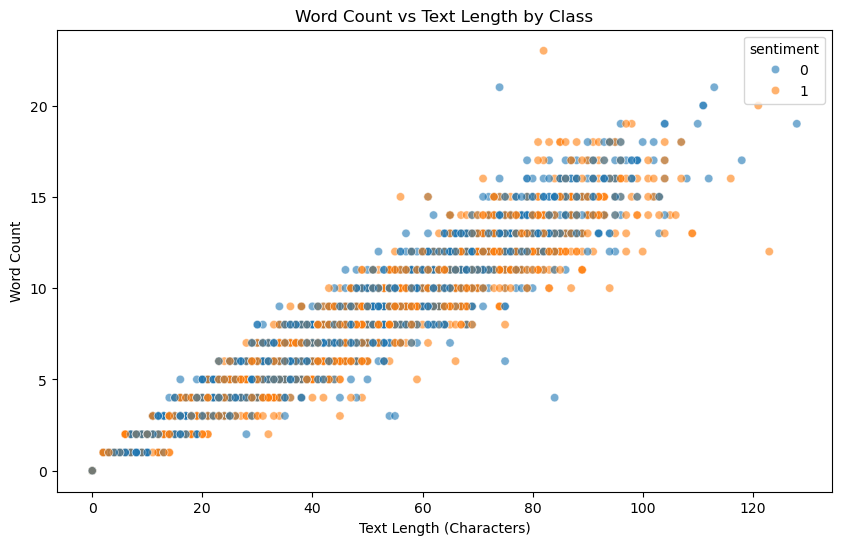

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data.sample(5000, random_state=42),
    x="text_length",
    y="word_count",
    hue="sentiment",
    alpha=0.6
)
plt.title("Word Count vs Text Length by Class")
plt.xlabel("Text Length (Characters)")
plt.ylabel("Word Count")
plt.show()

**The scatter plot shows a clear linear relationship between text length and word count—longer tweets naturally contain more words. Both sentiment classes follow the same pattern and overlap heavily, meaning neither word count nor text length helps distinguish between the two classes. These structural features provide little predictive power for sentiment classification.**

# **MultinomialNB Model**


Class distribution in full data:
sentiment
1    250604
0    249355
2        41
Name: count, dtype: int64
Best params: {'clf__alpha': 5.0}
y_test shape: (100000,)
y_proba shape: (100000, 3)
Accuracy : 0.7528
Precision: 0.5020
Recall   : 0.5019
F1-score : 0.5018
AUC (macro, OVR): 0.8260


c:\Users\moala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 640x480 with 0 Axes>

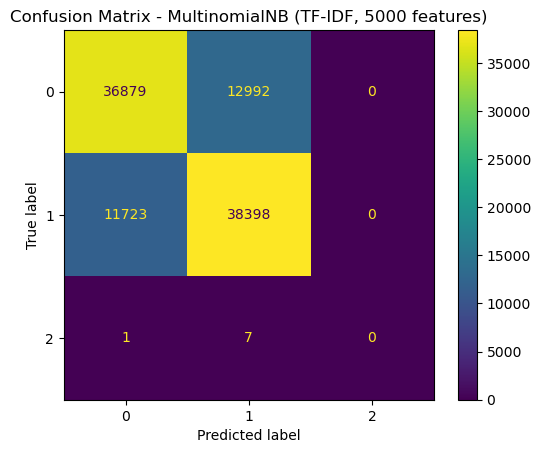

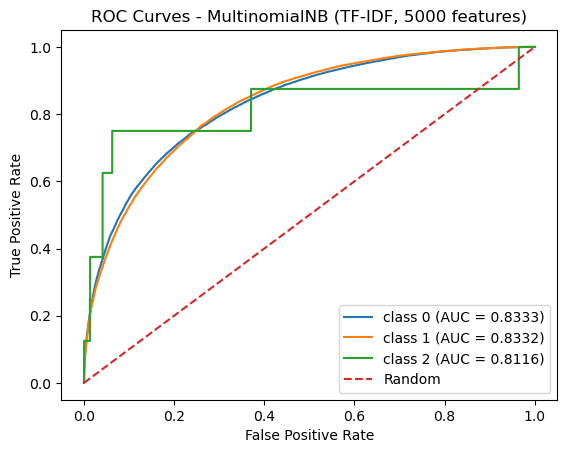

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

print("Class distribution in full data:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, stop_words="english")),
    ("clf", MultinomialNB())
])

param_grid = {
    "clf__alpha": [0.1, 0.5, 1.0, 2.0, 5.0]
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print("Best params:", grid.best_params_)

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)

print("y_test shape:", y_test.shape)
print("y_proba shape:", y_proba.shape)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
rec = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

auc_macro = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"AUC (macro, OVR): {auc_macro:.4f}")

classes = best_model.named_steps["clf"].classes_
y_test_bin = label_binarize(y_test, classes=classes)
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure()
disp.plot(values_format="d")
plt.title("Confusion Matrix - MultinomialNB (TF-IDF, 5000 features)")
plt.show()

plt.figure()
for i, cls in enumerate(classes):
    if np.sum(y_test == cls) < 2:
        continue
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    auc_i = roc_auc_score(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f"class {cls} (AUC = {auc_i:.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - MultinomialNB (TF-IDF, 5000 features)")
plt.legend()

This cell builds and evaluates a Naive Bayes sentiment classifier on the tweets.

In one pipeline, it converts text to TF-IDF features and then applies a Multinomial Naive Bayes model.  
Grid search is used to find the best smoothing value (alpha) using cross-validation, and then the best model is tested on a held-out test set.

The code prints overall performance metrics (accuracy, macro precision, recall, F1, and macro AUC), and then visualizes:
- a confusion matrix showing how often each class is correctly or incorrectly predicted
- ROC curves for each class to show how well the classifier separates that class from the others.


Class distribution in full data:
sentiment
1    250604
0    249355
2        41
Name: count, dtype: int64
Best params: {'clf__alpha': 5.0}
y_test shape: (100000,)
y_proba shape: (100000, 3)
Accuracy : 0.7535
Precision: 0.5024
Recall   : 0.5024
F1-score : 0.5024
AUC (macro, OVR): 0.8235


<Figure size 640x480 with 0 Axes>

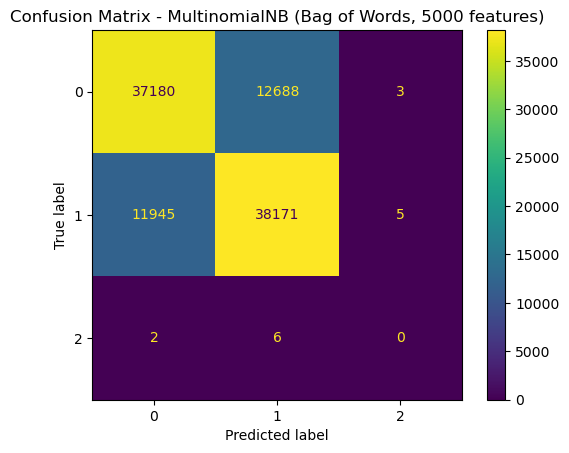

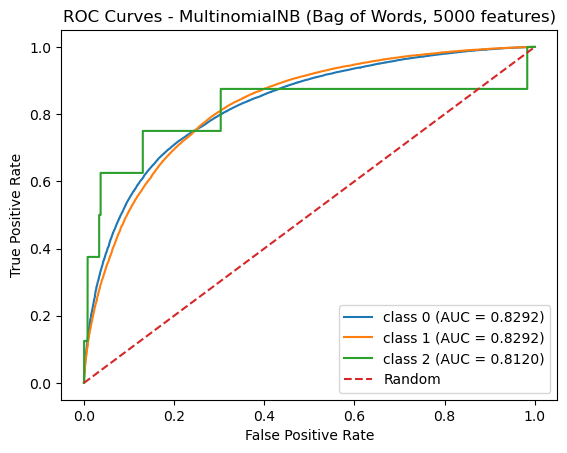

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
print("Class distribution in full data:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

pipe = Pipeline([
    ("bow", CountVectorizer(max_features=5000, stop_words="english")),
    ("clf", MultinomialNB())
])

param_grid = {
    "clf__alpha": [0.1, 0.5, 1.0, 2.0, 5.0]
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print("Best params:", grid.best_params_)

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)

print("y_test shape:", y_test.shape)
print("y_proba shape:", y_proba.shape)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
rec = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

auc_macro = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"AUC (macro, OVR): {auc_macro:.4f}")

classes = best_model.named_steps["clf"].classes_
y_test_bin = label_binarize(y_test, classes=classes)

cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure()
disp.plot(values_format="d")
plt.title("Confusion Matrix - MultinomialNB (Bag of Words, 5000 features)")
plt.show()

plt.figure()
for i, cls in enumerate(classes):
    if np.sum(y_test == cls) < 2:
        continue
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    auc_i = roc_auc_score(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f"class {cls} (AUC = {auc_i:.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - MultinomialNB (Bag of Words, 5000 features)")
plt.legend()
plt.show()


This cell builds and evaluates a Naive Bayes sentiment classifier using a Bag-of-Words representation.

It first splits the data into training and test sets (80/20) with stratified sampling.  
Then it creates a pipeline that:
- converts tweets into Bag-of-Words features with CountVectorizer (up to 5000 English words, removing stopwords)
- trains a Multinomial Naive Bayes classifier

GridSearchCV tunes the alpha smoothing parameter using 5-fold cross-validation, optimizing macro F1, and selects the best model.  
The best model is then evaluated on the test set, printing accuracy, macro precision, macro recall, macro F1, and macro AUC (one-vs-rest).

Finally, the code:
- plots a confusion matrix to show how often each class is correctly or incorrectly predicted
- plots ROC curves for each class to visualize how well the model separates that class from the others compared to random guessing.

# **Linear SVM Model**

Class distribution in full data:
sentiment
1    250604
0    249355
2        41
Name: count, dtype: int64
Best params: {'clf__C': 0.1}
y_test shape: (100000,)
y_scores shape: (100000, 3)
Accuracy : 0.7593
Precision: 0.5074
Recall   : 0.5062
F1-score : 0.5059


c:\Users\moala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


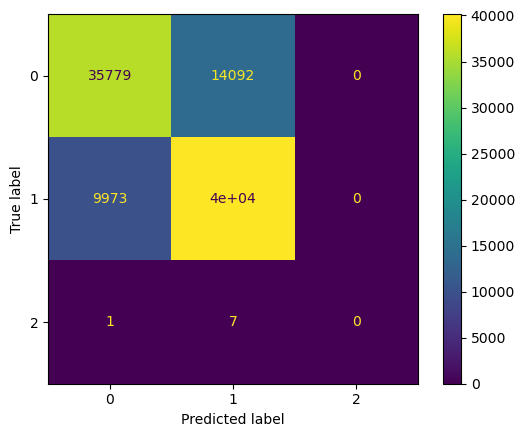

AUC (macro, OVR): 0.8238


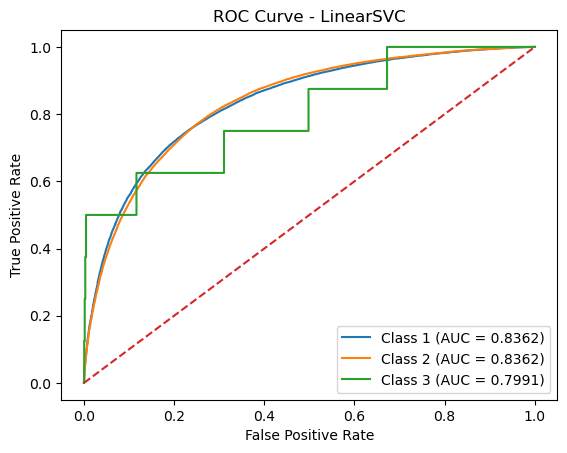

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

print("Class distribution in full data:")
print(data["sentiment"].value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    data["text"],
    data["sentiment"],
    test_size=0.2,
    random_state=42,
    stratify=data["sentiment"]
)

pipe = Pipeline([
    ("bow", CountVectorizer(max_features=5000, stop_words="english")),
    ("clf", LinearSVC())
])

param_grid = {
    "clf__C": [.1, 1, 10]
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

print("Best params:", grid.best_params_)

y_pred = best_model.predict(X_test)
scores = best_model.decision_function(X_test)

print("y_test shape:", y_test.shape)
print("y_scores shape:", scores.shape)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
rec = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

classes = best_model.named_steps["clf"].classes_
cm = confusion_matrix(y_test, y_pred, labels=classes)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes).plot()
plt.show()

y_test_bin = label_binarize(y_test, classes=classes)

auc = roc_auc_score(y_test_bin, scores, multi_class="ovr", average="macro")
print(f"AUC (macro, OVR): {auc:.4f}")

plt.figure()

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], scores[:, i])
    auc_i = roc_auc_score(y_test_bin[:, i], scores[:, i])
    plt.plot(fpr, tpr, label=f"Class {i+1} (AUC = {auc_i:.4f})")

plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LinearSVC")
plt.legend()
plt.show()

Class distribution in full data:
sentiment
1    250604
0    249355
2        41
Name: count, dtype: int64
Best params: {'clf__C': 0.1}
y_test shape: (100000,)
y_scores shape: (100000, 3)
Accuracy : 0.7604
Precision: 0.5075
Recall   : 0.5069
F1-score : 0.5068


c:\Users\moala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


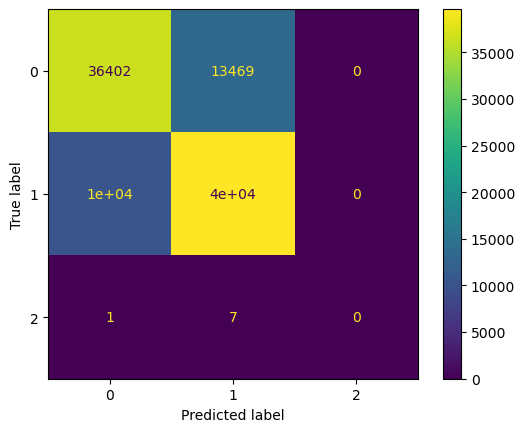

AUC (macro, OVR): 0.8306


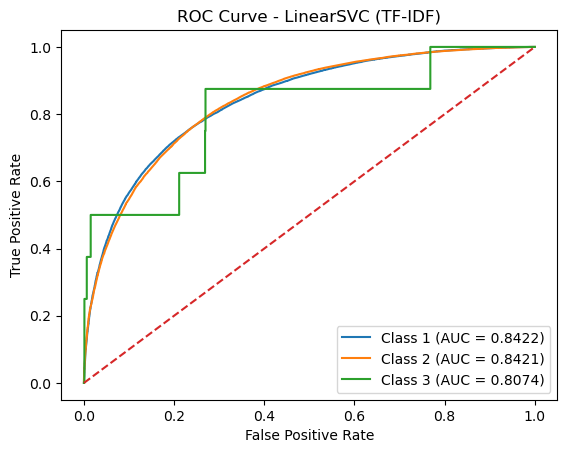

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

print("Class distribution in full data:")
print(data["sentiment"].value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    data["text"],
    data["sentiment"],
    test_size=0.2,
    random_state=42,
    stratify=data["sentiment"]
)

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, stop_words="english")),
    ("clf", LinearSVC())
])

param_grid = {
    "clf__C": [.1, 1, 10]
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

print("Best params:", grid.best_params_)

y_pred = best_model.predict(X_test)
scores = best_model.decision_function(X_test)

print("y_test shape:", y_test.shape)
print("y_scores shape:", scores.shape)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
rec = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

classes = best_model.named_steps["clf"].classes_
cm = confusion_matrix(y_test, y_pred, labels=classes)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes).plot()
plt.show()

y_test_bin = label_binarize(y_test, classes=classes)

auc = roc_auc_score(y_test_bin, scores, multi_class="ovr", average="macro")
print(f"AUC (macro, OVR): {auc:.4f}")

plt.figure()

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], scores[:, i])
    auc_i = roc_auc_score(y_test_bin[:, i], scores[:, i])
    plt.plot(fpr, tpr, label=f"Class {i+1} (AUC = {auc_i:.4f})")

plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LinearSVC (TF-IDF)")
plt.legend()
plt.show()

# **Logistic Regression**

Class distribution in full data:
sentiment
1    250604
0    249355
2        41
Name: count, dtype: int64
Best params: {'clf__C': 1, 'clf__penalty': 'l1'}
Accuracy : 0.7605
Precision: 0.5079
Recall   : 0.5070
F1-score : 0.5068
AUC (macro, OVR): 0.8128


c:\Users\moala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


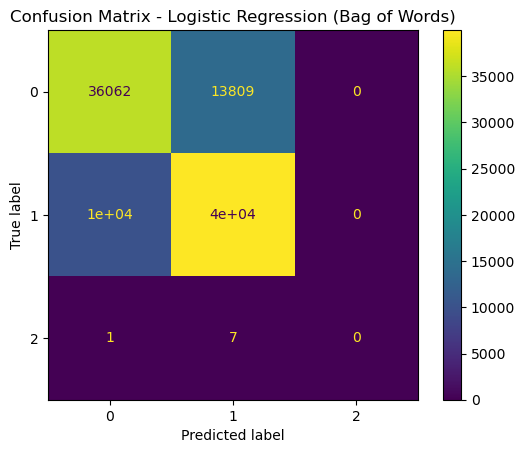

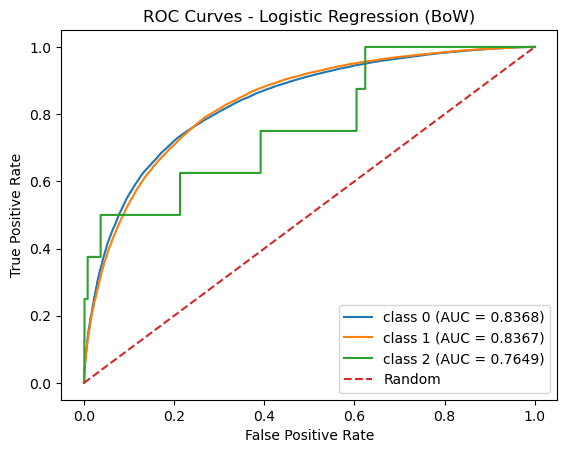

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

print("Class distribution in full data:")
print(data["sentiment"].value_counts())

# Split raw text not features
X_train, X_test, y_train, y_test = train_test_split(
    data["text"], data["sentiment"],
    test_size=0.2,
    random_state=42,
    stratify=data["sentiment"]
)

pipe = Pipeline([
    ("bow", CountVectorizer(max_features=5000, stop_words="english")),
    ("clf", LogisticRegression(
        max_iter=1000,
        solver="liblinear"
    ))
])

param_grid = {
    "clf__C": [0.01, 0.1, 1, 10, 100],
    "clf__penalty": ["l1", "l2"]
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best params:", grid.best_params_)

y_pred = best_model.predict(X_test)
y_proba_all = best_model.predict_proba(X_test)

acc = accuracy_score(y_test, y_pred)

prec = precision_score(y_test, y_pred, average="macro")
rec = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")


classes = best_model.named_steps["clf"].classes_
y_test_bin = label_binarize(y_test, classes=classes)
auc = roc_auc_score(y_test_bin, y_proba_all, multi_class="ovr", average="macro")

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"AUC (macro, OVR): {auc:.4f}")


cm = confusion_matrix(y_test, y_pred, labels=classes)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes).plot()
plt.title("Confusion Matrix - Logistic Regression (Bag of Words)")
plt.show()


plt.figure()
for i, cls in enumerate(classes):

    if np.sum(y_test == cls) < 2:
        continue
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_all[:, i])
    auc_i = roc_auc_score(y_test_bin[:, i], y_proba_all[:, i])
    plt.plot(fpr, tpr, label=f"class {cls} (AUC = {auc_i:.4f})")

plt.plot([0,1],[0,1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Logistic Regression (BoW)")
plt.legend()
plt.show()

Best params: {'clf__C': 1, 'clf__penalty': 'l1'}
Accuracy : 0.7613
Precision: 0.5081
Recall   : 0.5075
F1-score : 0.5074
AUC (macro, OVR): 0.7866


c:\Users\moala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


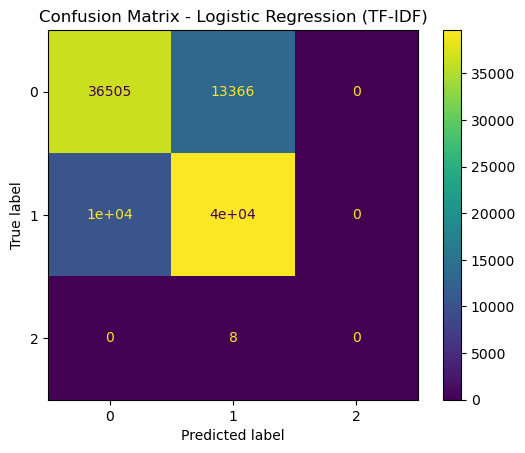

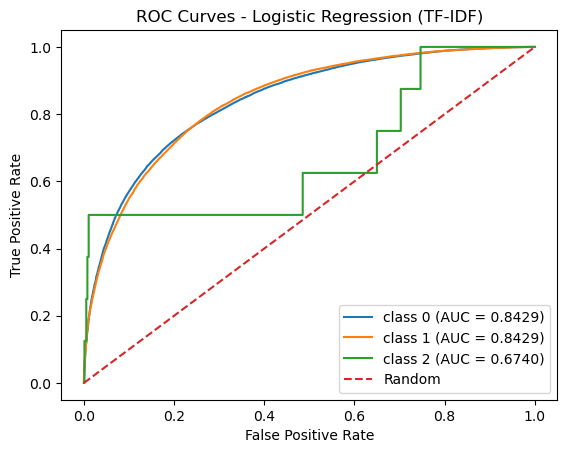

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, stop_words="english")),
    ("clf", LogisticRegression(
        max_iter=1000,
        solver="liblinear"
    ))
])

param_grid = {
    "clf__C": [0.01, 0.1, 1, 10, 100],
    "clf__penalty": ["l1", "l2"]
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best params:", grid.best_params_)

y_pred = best_model.predict(X_test)
y_proba_all = best_model.predict_proba(X_test)

acc = accuracy_score(y_test, y_pred)

prec = precision_score(y_test, y_pred, average="macro")
rec = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")


classes = best_model.named_steps["clf"].classes_
y_test_bin = label_binarize(y_test, classes=classes)
auc = roc_auc_score(y_test_bin, y_proba_all, multi_class="ovr", average="macro")

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"AUC (macro, OVR): {auc:.4f}")


cm = confusion_matrix(y_test, y_pred, labels=classes)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes).plot()
plt.title("Confusion Matrix - Logistic Regression (TF-IDF)")
plt.show()


plt.figure()
for i, cls in enumerate(classes):

    if np.sum(y_test == cls) < 2:
        continue
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_all[:, i])
    auc_i = roc_auc_score(y_test_bin[:, i], y_proba_all[:, i])
    plt.plot(fpr, tpr, label=f"class {cls} (AUC = {auc_i:.4f})")

plt.plot([0,1],[0,1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Logistic Regression (TF-IDF)")
plt.legend()
plt.show()

# Feature Embedding using Qwen LLM Model

In [22]:
import torch
print(torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())

2.4.1+cu121
CUDA available: True
CUDA device count: 1


This cell just checks GPU setup:  
it prints the PyTorch version then tells you if CUDA GPU support is available and how many  GPUs  system can see

In [23]:
from sentence_transformers import SentenceTransformer
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

model_name = "Qwen/Qwen3-Embedding-0.6B"
embed_model = SentenceTransformer(model_name, device=device)

Using device: cuda



It checks if a GPU is available and sets device to GPU or cpu
It chooses the model Qwen/Qwen3-Embedding-0.6B"
It loads this model with SentenceTransformer and moves it to the chosen device so it can be used to turn tweets into vector embeddings.


In [24]:
texts = data["text"].fillna("").tolist()

In [25]:
import numpy as np

embeddings = embed_model.encode(
    texts,
    batch_size=64,
    convert_to_numpy=True,
    show_progress_bar=True,
    normalize_embeddings=True
)

embeddings.shape

Batches:   0%|          | 0/7813 [00:00<?, ?it/s]

c:\Users\moala\anaconda3\Lib\site-packages\transformers\integrations\sdpa_attention.py:96: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


(500000, 1024)

This cell uses the loaded embedding model to convert all tweets into numeric vectors embed_model.encode() takes the list of texts and encodes them in batches of 64, returns a NumPy array, shows a progress bar, and L2-normalizes the embeddings embeddings is the resulting matrix of vectors (one row per tweet) embeddings.shape shows the size of this matrix number of tweets, embedding dimension


In [26]:
# Convert each embedding into Python list so Pandas can store it
data["embedding"] = embeddings.tolist()

## Training and testing models on Features embedding using Qwen model

Logistic Regression
Train Accuracy: 0.7535425
Test Accuracy: 0.75162


c:\Users\moala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moala\anaconda3\Lib\site-packag


Macro-Averaged Scores:
Precision: 0.5014501001014658
Recall: 0.5010800482844483
F1 Score: 0.5009892452516101

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.75     49871
           1       0.74      0.78      0.76     50121
           2       0.00      0.00      0.00         8

    accuracy                           0.75    100000
   macro avg       0.50      0.50      0.50    100000
weighted avg       0.75      0.75      0.75    100000



<Figure size 600x500 with 0 Axes>

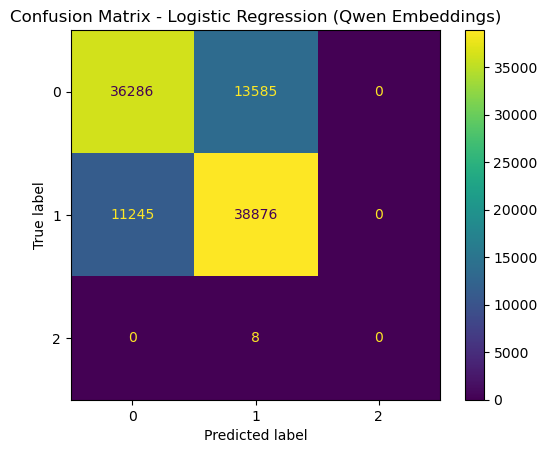


Macro-Averaged ROC-AUC: 0.8498391275977667


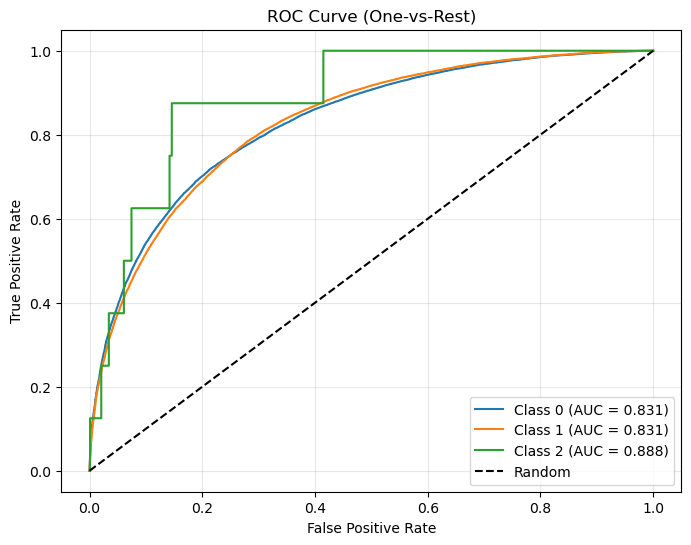

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_curve,
    auc,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    embeddings, 
    data["sentiment"], 
    test_size=0.2, 
    random_state=42,
    stratify=data["sentiment"]
)

clf_lr = LogisticRegression(max_iter=2000)
clf_lr.fit(X_train, y_train)

print("Logistic Regression")
print("Train Accuracy:", clf_lr.score(X_train, y_train))
print("Test Accuracy:", clf_lr.score(X_test, y_test))

y_pred = clf_lr.predict(X_test)

macro_precision = precision_score(y_test, y_pred, average="macro")
macro_recall = recall_score(y_test, y_pred, average="macro")
macro_f1 = f1_score(y_test, y_pred, average="macro")

print("\nMacro-Averaged Scores:")
print("Precision:", macro_precision)
print("Recall:", macro_recall)
print("F1 Score:", macro_f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
plt.figure(figsize=(6, 5))
disp.plot(values_format="d")
plt.title("Confusion Matrix - Logistic Regression (Qwen Embeddings)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

y_score = clf_lr.predict_proba(X_test)

macro_roc_auc = roc_auc_score(y_test_bin, y_score, average="macro")
print("\nMacro-Averaged ROC-AUC:", macro_roc_auc)

plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.title("ROC Curve (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Multinomial Naive Bayes
Train Accuracy: 0.716605
Test Accuracy: 0.71582


c:\Users\moala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moala\anaconda3\Lib\site-packag


Macro-Averaged Scores:
Precision: 0.47834942570942446
Recall: 0.477176317108791
F1 Score: 0.4768151942424663

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70     49871
           1       0.70      0.76      0.73     50121
           2       0.00      0.00      0.00         8

    accuracy                           0.72    100000
   macro avg       0.48      0.48      0.48    100000
weighted avg       0.72      0.72      0.72    100000



<Figure size 600x500 with 0 Axes>

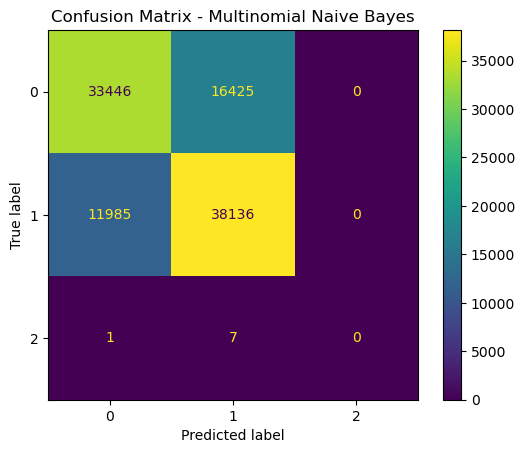


Macro-Averaged ROC-AUC: 0.8470138782199556


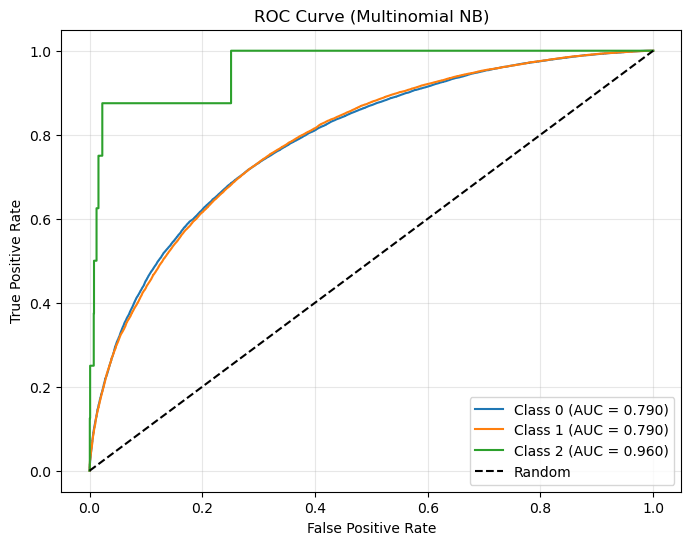

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_curve,
    auc,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

scaler = MinMaxScaler()
X_train_m = scaler.fit_transform(X_train)
X_test_m  = scaler.transform(X_test)

clf_nb = MultinomialNB()
clf_nb.fit(X_train_m, y_train)

print("Multinomial Naive Bayes")
print("Train Accuracy:", clf_nb.score(X_train_m, y_train))
print("Test Accuracy:", clf_nb.score(X_test_m, y_test))

y_pred_nb = clf_nb.predict(X_test_m)

macro_precision_nb = precision_score(y_test, y_pred_nb, average="macro")
macro_recall_nb = recall_score(y_test, y_pred_nb, average="macro")
macro_f1_nb = f1_score(y_test, y_pred_nb, average="macro")

print("\nMacro-Averaged Scores:")
print("Precision:", macro_precision_nb)
print("Recall:", macro_recall_nb)
print("F1 Score:", macro_f1_nb)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred_nb, labels=np.unique(y_test))
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=np.unique(y_test))
plt.figure(figsize=(6, 5))
disp_nb.plot(values_format="d")
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_score_nb = clf_nb.predict_proba(X_test_m)

macro_roc_auc_nb = roc_auc_score(y_test_bin, y_score_nb, average="macro")
print("\nMacro-Averaged ROC-AUC:", macro_roc_auc_nb)

plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_nb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.title("ROC Curve (Multinomial NB)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


It scales the features to 0, 1 fits the Naive Bayes model, then prints train test accuracy  precision recall F1 and a classification report Finally it shows a confusion matrix and ROC curves to visualize how well the model distinguishes between the sentiment classes

Linear SVM (LinearSVC)
Train Accuracy: 0.7567775
Test Accuracy: 0.75296


c:\Users\moala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moala\anaconda3\Lib\site-packag


Macro-Averaged Scores:
Precision: 0.5023741728399452
Recall: 0.5019719917643434
F1 Score: 0.5018755825734073

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75     49871
           1       0.74      0.78      0.76     50121
           2       0.00      0.00      0.00         8

    accuracy                           0.75    100000
   macro avg       0.50      0.50      0.50    100000
weighted avg       0.75      0.75      0.75    100000



<Figure size 600x500 with 0 Axes>

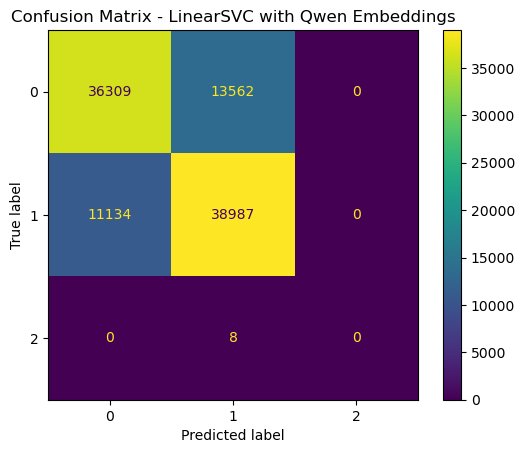


Macro-Averaged ROC-AUC (OvR): 0.8691115173354812


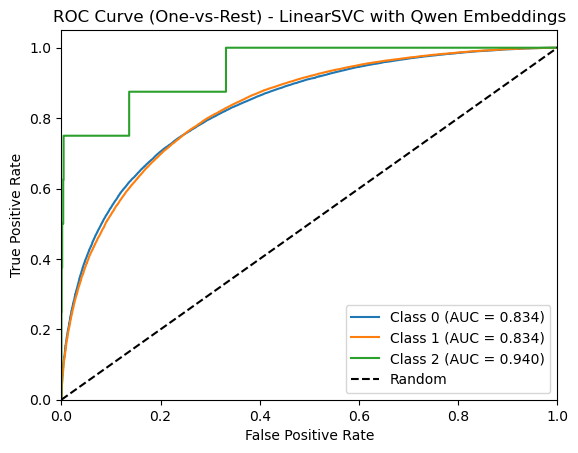

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_curve,
    auc,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.svm import LinearSVC

clf_svm = LinearSVC()
clf_svm.fit(X_train, y_train)

print("Linear SVM (LinearSVC)")
print("Train Accuracy:", clf_svm.score(X_train, y_train))
print("Test Accuracy:", clf_svm.score(X_test, y_test))

y_pred_svm = clf_svm.predict(X_test)

macro_precision_svm = precision_score(y_test, y_pred_svm, average="macro")
macro_recall_svm = recall_score(y_test, y_pred_svm, average="macro")
macro_f1_svm = f1_score(y_test, y_pred_svm, average="macro")

print("\nMacro-Averaged Scores:")
print("Precision:", macro_precision_svm)
print("Recall:", macro_recall_svm)
print("F1 Score:", macro_f1_svm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm, labels=np.unique(y_test))
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=np.unique(y_test))
plt.figure(figsize=(6, 5))
disp_svm.plot(values_format="d")
plt.title("Confusion Matrix - LinearSVC with Qwen Embeddings")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = clf_svm.decision_function(X_test)

fpr = {}
tpr = {}
roc_auc = {}

for i, cls in enumerate(classes):
    fpr[cls], tpr[cls], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[cls] = auc(fpr[cls], tpr[cls])

macro_roc_auc = roc_auc_score(y_test_bin, y_score, multi_class="ovr", average="macro")
print("\nMacro-Averaged ROC-AUC (OvR):", macro_roc_auc)

plt.figure()
for cls in classes:
    plt.plot(fpr[cls], tpr[cls], label=f"Class {cls} (AUC = {roc_auc[cls]:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest) - LinearSVC with Qwen Embeddings")
plt.legend(loc="lower right")
plt.show()


## For Future using

In [30]:
np.save("qwen_embeddings.npy", embeddings)

In [31]:
embeddings = np.load("qwen_embeddings.npy")

Interpretation of Findings
The‍‌‍‍‌ major outcome of this work is the mismatch between the high level of accuracy and the moderate macro-averaged metrics. Models are successful in identifying most negative and positive tweets, which results in a high accuracy, but at the same time, they almost completely miss the neutral class, which lowers the values of macro precision, recall, and F1. The confusion matrices demonstrate that there are very few neutral tweets correctly identified and a great number of them being misclassified as the majority classes. The experiments also point to the fact that Qwen embeddings raise ranking quality (high ROC–AUC values) but do not necessarily solve label imbalance: the models still tend to make negative and positive predictions. In other words, the classifiers are indeed locating meaningful decision boundaries, but the default thresholds and loss functions are not set for balanced performance across the three ‍‌‍‍‌classes

Summary of Findings
This‍‌‍‍‌ project developed a complete pipeline for the three-class sentiment classification on the Sentiment140 dataset with Bag-of-Words, TF-IDF, and Qwen embeddings in combination with Multinomial Naive Bayes, Linear SVM, and Logistic Regression. The models reached high accuracies 0.75–0.76 but only moderate macro-averaged F1 0.50, which was mainly due to the fact that the neutral class is rarely predicted. Linear SVM and Logistic Regression with TF-IDF or Qwen embeddings turned out to be strong baselines, while Qwen embeddings helped to improve ROC and AUC scores but did not solve the imbalance issue by ‍‌‍‍‌themselves.
Key Takeaways
1.	Accuracy can be very deceiving when used on imbalanced sentiment data; hence, macro-averaged metrics and confusion matrices are absolutely necessary.
2.	The imbalance of classes has a very strong impact on the results, thus accuracy can be very high while the detection of neutral tweets is at a very low level.
3.	Simple linear models with standard text representations still can be considered as strong and scalable baselines for large-scale sentiment analysis.
4.	Pretrained embeddings like Qwen make the representation and ranking better, however, they still need some more techniques to achieve balanced ‍‌‍‍‌performance.
